In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [7]:
df_filtrado = df[(df['Glucose'] != 0) &
                 (df['BloodPressure'] != 0) &
                 (df['SkinThickness'] != 0) &
                 (df['BMI'] != 0) &
                 (df['DiabetesPedigreeFunction'] <= 1)]

In [8]:
df_filtrado.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,3.520408,120.069388,71.277551,28.953061,112.926531,32.648776,0.429639,31.328571,0.310204
std,3.289164,30.309705,12.289808,10.439417,119.808584,6.764294,0.222667,10.709217,0.463050
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.250000,64.000000,21.000000,0.000000,27.800000,0.251250,23.000000,0.000000
50%,2.000000,114.000000,70.000000,29.000000,90.000000,32.600000,0.383000,27.000000,0.000000
75%,5.000000,139.750000,80.000000,36.000000,160.000000,36.600000,0.587750,37.000000,1.000000
max,17.000000,198.000000,110.000000,99.000000,846.000000,67.100000,0.997000,81.000000,1.000000


In [25]:
df_nulls = df
df_nulls['Glucose'] = df_nulls['Glucose'].replace(0, np.nan) 
df_nulls['BloodPressure'] = df_nulls['BloodPressure'].replace(0, np.nan) 
df_nulls['SkinThickness'] = df_nulls['SkinThickness'].replace(0, np.nan) 
df_nulls['Insulin'] = df_nulls['Insulin'].replace(0, np.nan) 
df_nulls['BMI'] = df_nulls['BMI'].replace(0, np.nan) 
print(df_nulls.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

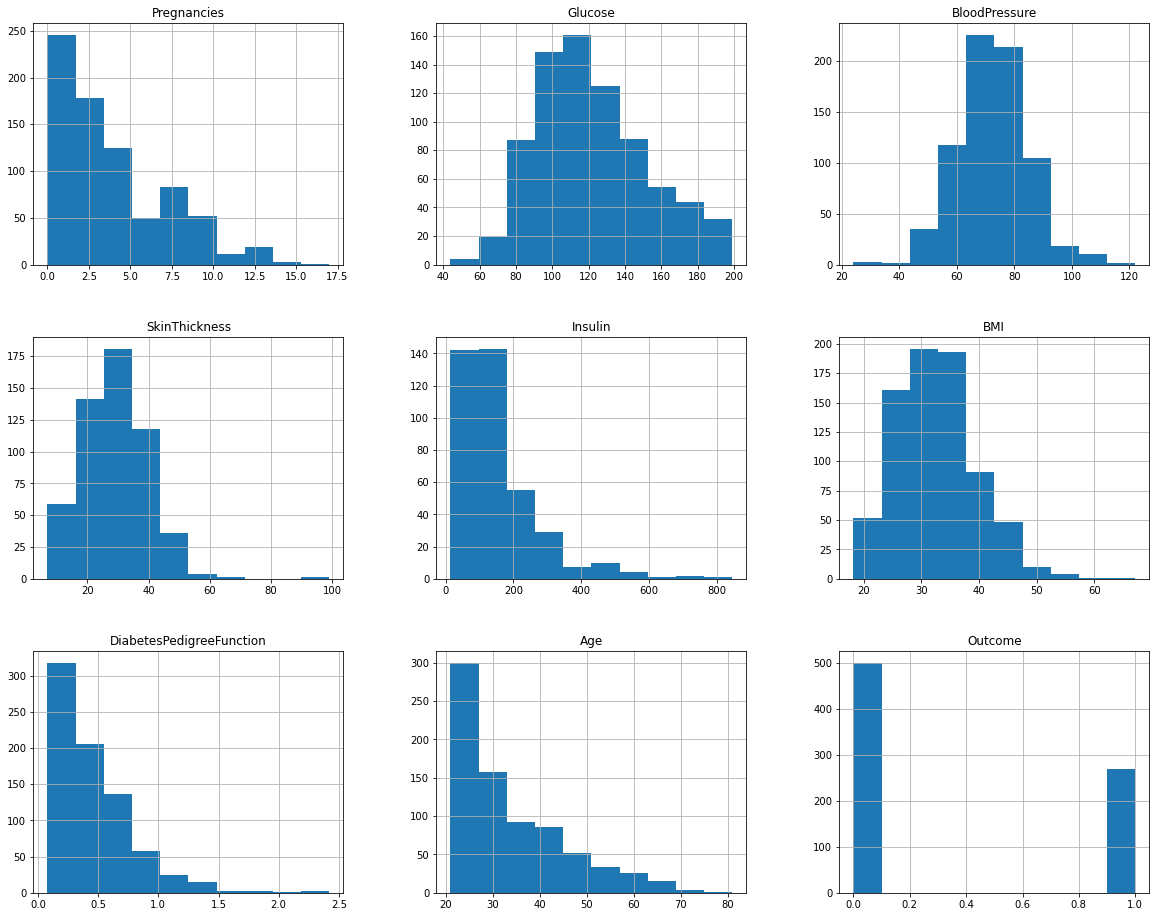

In [26]:
df_nulls.hist(figsize = (20,16), grid=True)

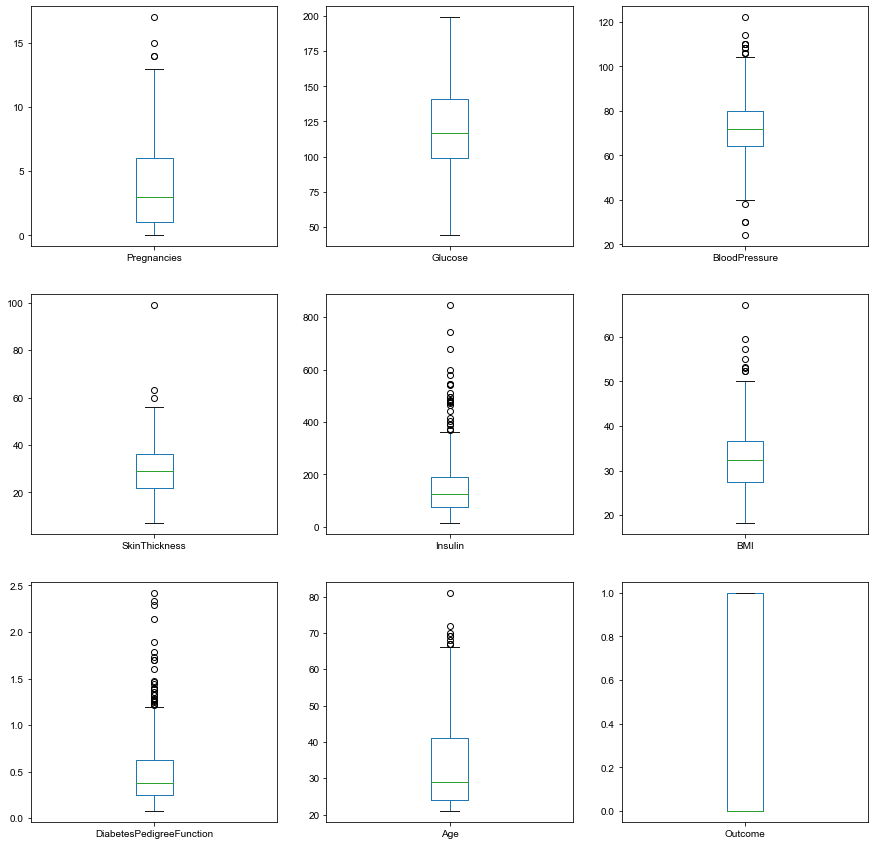

In [27]:
df_nulls.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df_filtrado[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',\
                                                             'BMI', 'DiabetesPedigreeFunction', 'Age']],\
                                                   df_filtrado['Outcome'], test_size = 0.2)

In [130]:
corr = X_train.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.156140,0.207834,0.138497,0.050312,-0.003497,0.634667
Glucose,0.156140,1.000000,0.233614,0.256232,0.271036,0.157091,0.287945
BloodPressure,0.207834,0.233614,1.000000,0.220101,0.334731,0.022699,0.353336
SkinThickness,0.138497,0.256232,0.220101,1.000000,0.627330,0.156435,0.231343
BMI,0.050312,0.271036,0.334731,0.627330,1.000000,0.191415,0.118701
DiabetesPedigreeFunction,-0.003497,0.157091,0.022699,0.156435,0.191415,1.000000,0.074307
Age,0.634667,0.287945,0.353336,0.231343,0.118701,0.074307,1.000000


<AxesSubplot:>

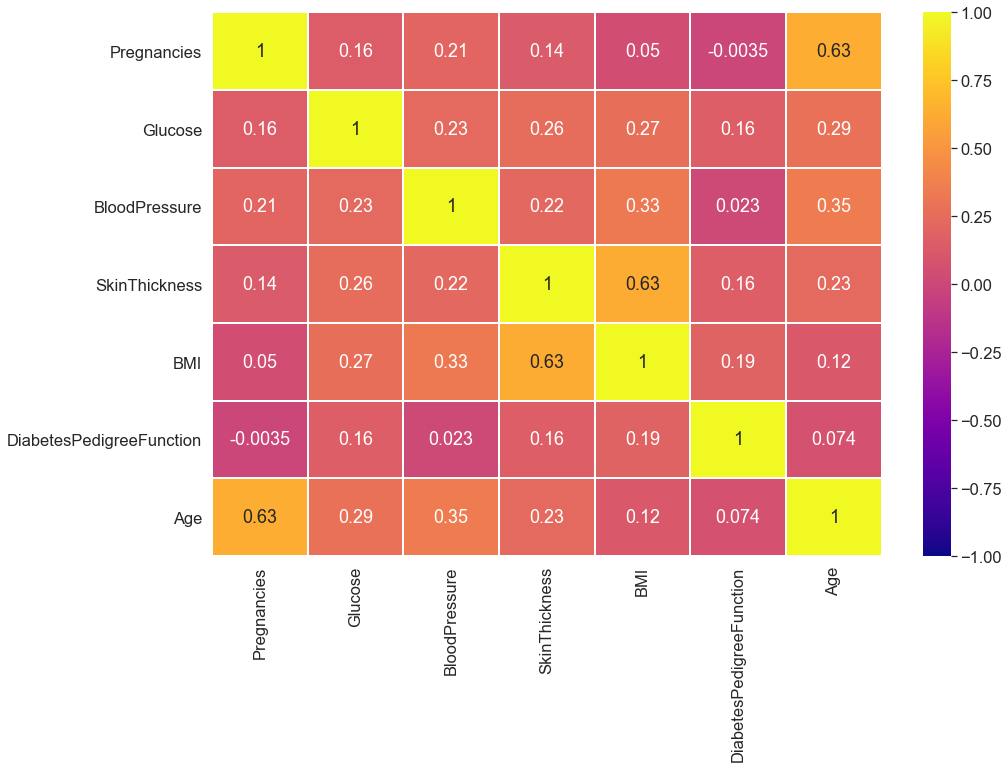

In [131]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
accuracy = []

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df_filtrado[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin',\
                                                                 'BMI', 'DiabetesPedigreeFunction', 'Age']],\
                                                       df_filtrado['Outcome'], test_size = 0.2)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    s = X_test.shape[0]
    acc = (y_test.values.reshape(y_test.values.shape[0],) == y_pred).sum()
    accuracy.append(acc/s*100)

print(max(accuracy), min(accuracy), np.mean(accuracy), np.std(accuracy))

85.04672897196261 66.35514018691589 75.73831775700934 3.6362707330575894


In [52]:
(79-22)/79

0.7215189873417721

In [53]:
df_filtrado['Outcome'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: Outcome, dtype: float64